In [64]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [75]:
# Load your dataset
data = pd.read_csv('dataset.csv')

# Convert 'regDate' to datetime format
data['regDate'] = pd.to_datetime(data['regDate'])

# Feature engineering
data['weekDay'] = data['regDate'].dt.dayofweek  # Day of week (0=Monday, 6=Sunday)
data['hour'] = data['regDate'].dt.hour  # Hour of the day
data['dayOfMonth'] = data['regDate'].dt.day
data['month'] = data['regDate'].dt.month
data['year'] = data['regDate'].dt.year

In [76]:
# Define features and target
X = data[['weekDay', 'hour', 'dayOfMonth', 'month', 'year']]
y = data['water_score']

In [78]:
current_month = 7
current_year= 2023

In [79]:
# Initialize the model
model = LinearRegression()

# Create an array of days and hours for prediction
days = np.arange(7)  # 0 to 6 for each day of the week
hours = np.arange(24)  # 0 to 23 for each hour

# Create an empty DataFrame to store predicted scores
predicted_data = pd.DataFrame(columns=['dayOfWeek', 'hour', 'predicted_score'])

# Loop through each day and hour to make predictions
for day in days:
    for hour in hours:
        # Filter data for the specific day and hour
        day_hour_data = data[(data['weekDay'] == day) & (data['hour'] == hour)]
        X_hour = day_hour_data[['weekDay', 'hour', 'dayOfMonth', 'month', 'year']]
        y_hour = day_hour_data['water_score']

        # Fit the model for the specific day and hour
        model.fit(X_hour, y_hour)

        # Create feature values for the prediction
        features = pd.DataFrame({
            'weekDay': [day],
            'hour': [hour],
            'dayOfMonth': [1],  # Just a placeholder since we're predicting hourly
            'month': [current_month],  # Replace with current month
            'year': [current_year]  # Replace with current year
        })

        # Predict water score
        predicted_score = model.predict(features)

        # Append the prediction to the DataFrame
        predicted_data = predicted_data.append({
            'dayOfWeek': day,
            'hour': hour,
            'predicted_score': predicted_score[0]
        }, ignore_index=True)


<ipython-input-79-c5252e9bf13c>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted_data = predicted_data.append({
<ipython-input-79-c5252e9bf13c>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted_data = predicted_data.append({
<ipython-input-79-c5252e9bf13c>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted_data = predicted_data.append({
<ipython-input-79-c5252e9bf13c>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted_data = predicted_data.append({
<ipython-input-79-c5252e9bf13c>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

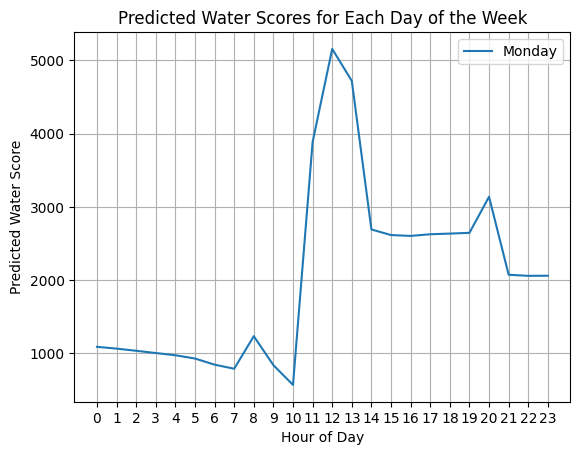

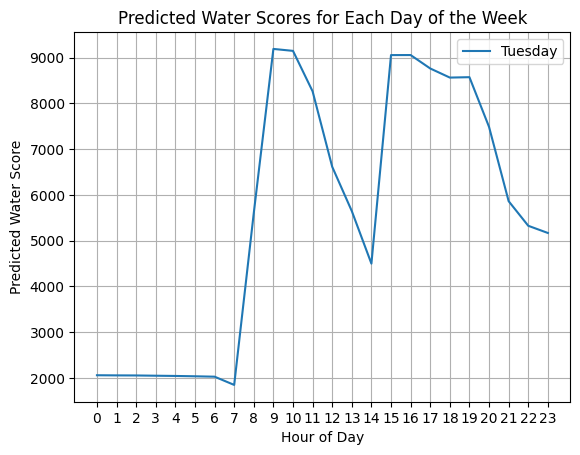

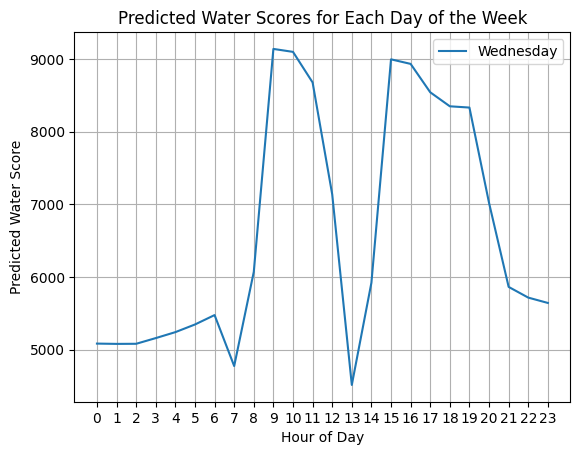

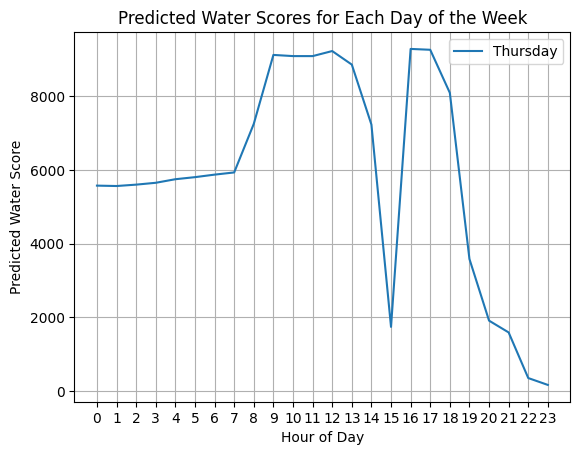

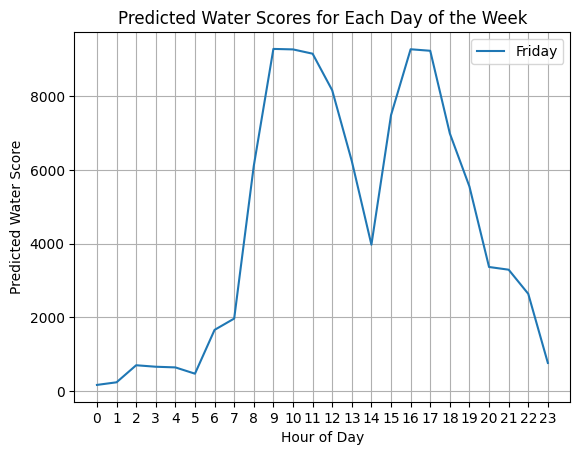

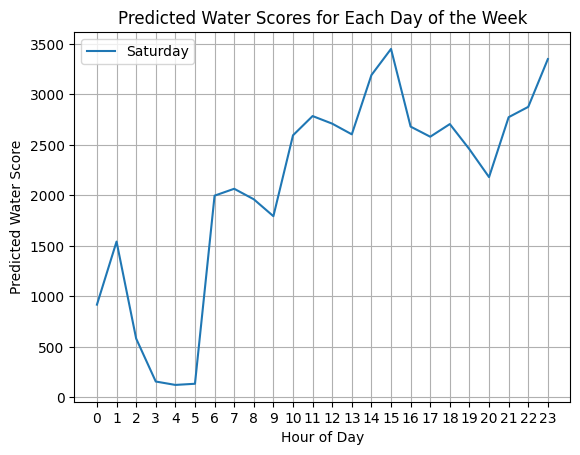

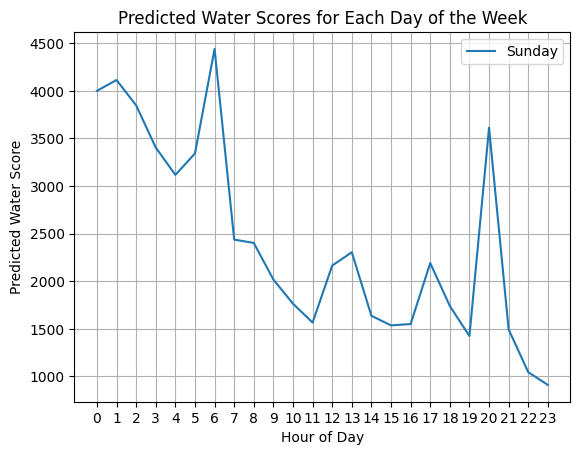

In [86]:
# List of day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Visualize the predicted data
for day in days:
    day_data = predicted_data[predicted_data['dayOfWeek'] == day]
    plt.plot(day_data['hour'], day_data['predicted_score'], label=day_names[day])
    plt.xlabel('Hour of Day')
    plt.ylabel('Predicted Water Score')
    plt.title('Predicted Water Scores for Each Day of the Week')
    plt.xticks(hours)  # Set the x-axis ticks to match the hours
    plt.legend()
    plt.grid(True)
    plt.show()
